In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('adult.csv')
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**Заменим значения в бинарном признаке на 1 и 0**

In [4]:
data['income']=data['income'].map({'>50K':1, '<=50K':0})

**Сгенерим новые признаки на основе категориальных с помощью get_dummies**

In [5]:
cols = [c for c in data.columns if data[c].dtype == object]

In [6]:
cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [7]:
data = pd.get_dummies(data, columns = cols)

**Разделим наш датасет для обучения**

In [8]:
X = data
Y = X['income']
del X['income']

In [9]:
X.head(3)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


**Обучим модель на полученных данных**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 24815)

In [11]:
model = LogisticRegression()

In [12]:
model.fit(X_train,Y_train)

C:\Users\Aleksandr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
model.score(X_test, Y_test)

0.801132873814236

**Построим Precision-Recall**

In [14]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [15]:
predictions = model.predict_proba( X_test )

In [16]:
pr, re_, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


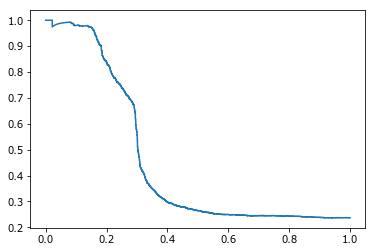

In [18]:
plt.plot( re_, pr )

**Посчитаем площадь под кривой**

In [19]:
from sklearn.metrics import average_precision_score

average_precision_score( Y_test, predictions[:, 1] )

0.453743930985648

**Посчитаем ROC-кривую (Receiver Operating Characteristic)**

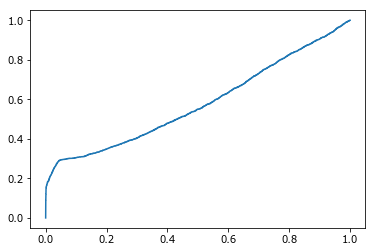

In [21]:
from sklearn.metrics import roc_curve

# получаем значения false и true positive rate для различных значений порога

fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
plt.plot( fpr, tpr )

**Построим еще пару моделей и сравним их между собой**

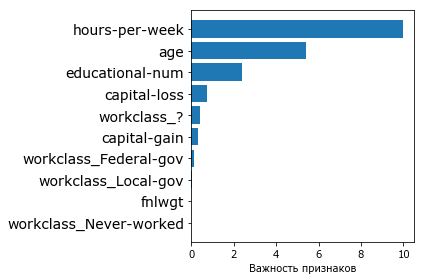

In [22]:
#Выберем самые информативные признаки для новой модели (отберём топ 5)
feature_importance = abs(model.coef_[0])[:10]
feature_importance = 10.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=14)
featax.set_xlabel('Важность признаков')

plt.tight_layout()   
plt.show()

In [24]:
Xshort = X.loc[ :, ['capital-gain', 'hours-per-week', 'age', 'capital-loss', 'workclass_?'] ]
Xshort.head()

,capital-gain,hours-per-week,age,capital-loss,workclass_?
0,0,40,25,0,0
1,0,50,38,0,0
2,0,40,28,0,0
3,7688,40,44,0,0
4,0,30,18,0,1


In [25]:
model2 = LogisticRegression()

In [26]:
X_train_short, X_test_short, y_train_short, y_test_short = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [28]:
model2.fit( X_train_short, y_train_short )

C:\Users\Aleksandr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
predictions2 = model2.predict_proba( X_test_short )

In [30]:
fpr2, tpr2, thres2 = roc_curve( y_test_short, predictions2[:, 1] )

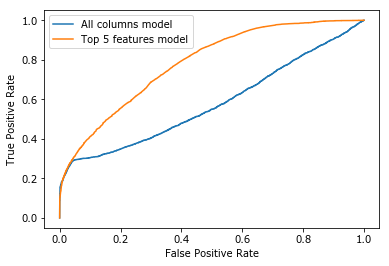

In [31]:
plt.plot( fpr, tpr, label = 'All columns model' )
plt.plot( fpr2, tpr2, label = 'Top 5 features model' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Модель на 5 признаках ведёт себя по-другому**

**Применим LightGBM и найдём одну из максимальных площадей по ROC-кривой**

In [32]:
from sklearn.model_selection import KFold, StratifiedKFold

In [33]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve

In [35]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 0 )

In [40]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'auc', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 36, 4)],
    'learning_rate': [0.125]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(x_train, y_train,
        eval_set = [(x_test, y_test)],
        eval_metric = ['auc','binary_logloss'],
        early_stopping_rounds = 5)

C:\Users\Aleksandr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's binary_logloss: 0.497038	valid_0's auc: 0.90265
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.459886	valid_0's auc: 0.905325
[3]	valid_0's binary_logloss: 0.431703	valid_0's auc: 0.907453
[4]	valid_0's binary_logloss: 0.409907	valid_0's auc: 0.907872
[5]	valid_0's binary_logloss: 0.392275	valid_0's auc: 0.908656
[6]	valid_0's binary_logloss: 0.376752	valid_0's auc: 0.911219
[7]	valid_0's binary_logloss: 0.364846	valid_0's auc: 0.911475
[8]	valid_0's binary_logloss: 0.354698	valid_0's auc: 0.912157
[9]	valid_0's binary_logloss: 0.345591	valid_0's auc: 0.91308
[10]	valid_0's binary_logloss: 0.338411	valid_0's auc: 0.913292
[11]	valid_0's binary_logloss: 0.332213	valid_0's auc: 0.913661
[12]	valid_0's binary_logloss: 0.326186	valid_0's auc: 0.914895
[13]	valid_0's binary_logloss: 0.321748	valid_0's auc: 0.915801
[14]	valid_0's binary_logloss: 0.317063	valid_0's auc: 0.916604
[15]	valid_0's binary_logloss: 0.312999	valid_0's auc:

[1]	valid_0's binary_logloss: 0.497038	valid_0's auc: 0.90265
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.459886	valid_0's auc: 0.905325
[3]	valid_0's binary_logloss: 0.431703	valid_0's auc: 0.907453
[4]	valid_0's binary_logloss: 0.409907	valid_0's auc: 0.907872
[5]	valid_0's binary_logloss: 0.392275	valid_0's auc: 0.908656
[6]	valid_0's binary_logloss: 0.376752	valid_0's auc: 0.911219
[7]	valid_0's binary_logloss: 0.364846	valid_0's auc: 0.911475
[8]	valid_0's binary_logloss: 0.354698	valid_0's auc: 0.912157
[9]	valid_0's binary_logloss: 0.345591	valid_0's auc: 0.91308
[10]	valid_0's binary_logloss: 0.338411	valid_0's auc: 0.913292
[11]	valid_0's binary_logloss: 0.332213	valid_0's auc: 0.913661
[12]	valid_0's binary_logloss: 0.326186	valid_0's auc: 0.914895
[13]	valid_0's binary_logloss: 0.321748	valid_0's auc: 0.915801
[14]	valid_0's binary_logloss: 0.317063	valid_0's auc: 0.916604
[15]	valid_0's binary_logloss: 0.312999	valid_0's auc:

[1]	valid_0's binary_logloss: 0.496169	valid_0's auc: 0.899088
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.4589	valid_0's auc: 0.901652
[3]	valid_0's binary_logloss: 0.430311	valid_0's auc: 0.908778
[4]	valid_0's binary_logloss: 0.408641	valid_0's auc: 0.908637
[5]	valid_0's binary_logloss: 0.390328	valid_0's auc: 0.910405
[6]	valid_0's binary_logloss: 0.375727	valid_0's auc: 0.910956
[7]	valid_0's binary_logloss: 0.363538	valid_0's auc: 0.911494
[8]	valid_0's binary_logloss: 0.353391	valid_0's auc: 0.912047
[9]	valid_0's binary_logloss: 0.344493	valid_0's auc: 0.912635
[10]	valid_0's binary_logloss: 0.336455	valid_0's auc: 0.9137
[11]	valid_0's binary_logloss: 0.330574	valid_0's auc: 0.914104
[12]	valid_0's binary_logloss: 0.324898	valid_0's auc: 0.915711
[13]	valid_0's binary_logloss: 0.320077	valid_0's auc: 0.916234
[14]	valid_0's binary_logloss: 0.315735	valid_0's auc: 0.916801
[15]	valid_0's binary_logloss: 0.311878	valid_0's auc: 0

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='auc', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=38,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 24, 28, 32], 'learning_rate': [0.125]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
print('Лучшие параметры grid search:', gridsearch.best_params_)

Лучшие параметры grid search: {'learning_rate': 0.125, 'n_estimators': 32}


In [42]:
gbm = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 32)

gbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's binary_logloss: 0.497236	valid_0's l1: 0.342994	valid_0's auc: 0.900233
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.460349	valid_0's l1: 0.324888	valid_0's auc: 0.905349
[3]	valid_0's binary_logloss: 0.43226	valid_0's l1: 0.309062	valid_0's auc: 0.906134
[4]	valid_0's binary_logloss: 0.410257	valid_0's l1: 0.29529	valid_0's auc: 0.907582
[5]	valid_0's binary_logloss: 0.39268	valid_0's l1: 0.283356	valid_0's auc: 0.910167
[6]	valid_0's binary_logloss: 0.378058	valid_0's l1: 0.272601	valid_0's auc: 0.910678
[7]	valid_0's binary_logloss: 0.36592	valid_0's l1: 0.263176	valid_0's auc: 0.911575
[8]	valid_0's binary_logloss: 0.355461	valid_0's l1: 0.254719	valid_0's auc: 0.912535
[9]	valid_0's binary_logloss: 0.346354	valid_0's l1: 0.247189	valid_0's auc: 0.913364
[10]	valid_0's binary_logloss: 0.339231	valid_0's l1: 0.24075	valid_0's auc: 0.913493
[11]	valid_0's binary_logloss: 0.332599	valid_0's l1: 0.234674	valid_0's auc: 0.914

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=32, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

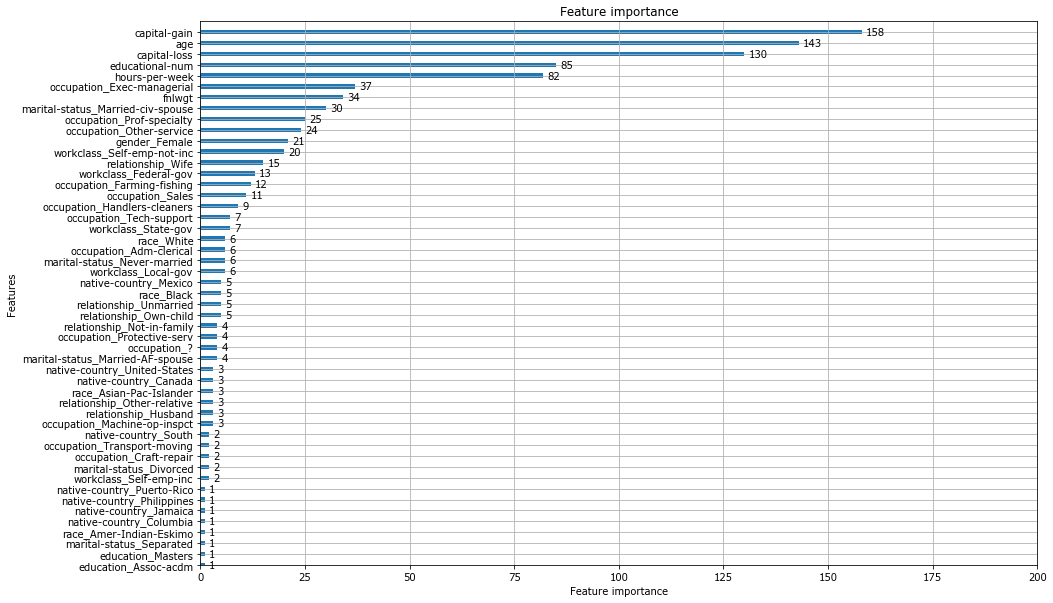

In [43]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 50, 
                         xlim = (0,200), ylim = (0,50), 
                         figsize = (15,10))
plt.show()

**Градиентный бустинг куда более точно определяет важность признаков**

In [46]:
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.8744966900975909
ROC AUC: 0.7937051198120463


In [51]:
y_pred_prob = gbm.predict_proba(x_test)[:, 1]

In [52]:
y_pred_prob

array([0.13771564, 0.74080616, 0.81589238, ..., 0.08801488, 0.07879401,
       0.02006063])

In [53]:
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, roc_auc_score

fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_pred_prob)

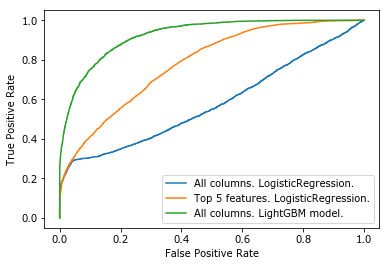

In [54]:
plt.plot( fpr, tpr, label = 'All columns. LogisticRegression.' )
plt.plot( fpr2, tpr2, label = 'Top 5 features. LogisticRegression.' )
plt.plot( fpr3, tpr3, label = 'All columns. LightGBM model.' )


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Мы видим, что градиентный бустинг над деревьями решений способен обучить модель более точно.**

**Увеличить площадь под ROC-кривой можно с помощью стекинга и блендинга, проводя дополнительно feature-инжиниринг.**